This exercise is about the modeling of the diffusion of particles in physics or chemistry.
It is composed of two parts, one simulating the diffusion in one dimension and one in
a plane.

#### Importing libraries

In [82]:
import numpy as np
import scipy.stats as sc
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.optimize import curve_fit

### First part: 
#### Diffusion in 1 dimension: the drunk walker

1. Write a function that calculates the final position of the walker as a function of
the parameter <i>p</i> and the number of steps <i>N</i>.

In [83]:
# The function final_position takes p - probability to move forward, N - number of steps
def calc_final_position(N, p):
  final_position = 0
  for step in range(N):
    final_position += np.random.choice([-1, 1], p = [1 - p, p])
  return final_position

2. What is the expected final position for <i>p</i> = 0.5? Check your guess by running
your function 100 times for 1000 steps.

In [84]:
n_experiments = 100
final_positions = np.array([])

for n in range(n_experiments):
    final_positions = np.append(final_positions, calc_final_position(1000, 0.5))
print(final_positions)

[-26.  16.  -8. -44.   2.  22. -16. -54. -24. -56. -36.  40.  -6. -14.
  54. -50.  42.  44.  38. -24.  16. -24.  10. -66. -16.  10.  34. -26.
 -40.  -6.  42. -80.  10.   8. -22.  10.   4.  26.  18.   4.  28. -24.
  -2.  18. -44.   8. -36. -22.  32.  12. -24.  26.  16.  28.  10.  30.
  -8. -42. -60. -22. -24. -36. -16. -16. -10.   8. -38.   8.  -6.  18.
   8.  22.  16.  -4.   0.  -8.  -2. -52.  14.  34. -24. -32.  -8.  12.
 -30. -50.  -4.  58. -18.  26.  46.   2.  -6. -58.  12. -28.   8.  -8.
 -22. -42.]


3. Represent the result as a histogram. Calculate the standard deviation $\sigma = 1000$ and
demonstrate that the distribution you obtained is a Gaussian.

Standard deviation sigma_1000 = 29.085054581348135
Shapiro: p_value  0.7067360281944275


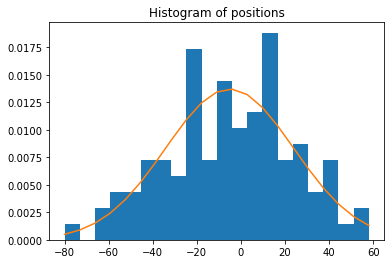

In [85]:
bins = plt.hist(final_positions, density=True, bins=20)[1]
mu, std = sc.norm.fit(final_positions)

plt.plot(bins, sc.norm.pdf(bins, mu, std))
plt.title('Histogram of positions')
print("Standard deviation sigma_1000 =", final_positions.std())
print("Shapiro: p_value ", sc.shapiro(final_positions)[1])
plt.savefig(f"part1_plots/ex3_gaussian.jpg")

As the p-value from Shapiro is greater than 0.5, exactly = 0.5091367959976196, then we can say that the distribution is Gaussian(Normal) distribution

4. Do the same for 20, 50, 100 and 200 steps. Fit the standard deviation $\sigma_N$ as a function of the number of steps <i>N</i> with appropriate mathematical law.

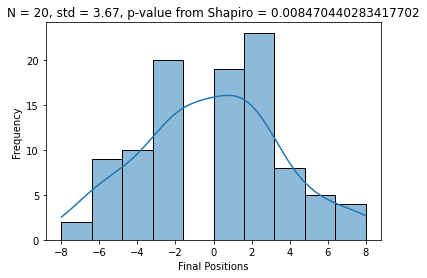

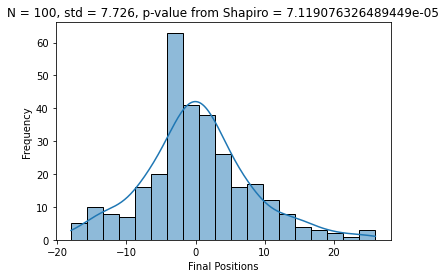

In [87]:
final_positions = np.array([])
n_steps = [20, 50, 100, 200]

stds = np.array([])
for steps in n_steps:
  for i in range(n_experiments):
    final_positions = np.append(final_positions, calc_final_position(p = 0.5, N = steps))
  
  fig, ax = plt.subplots()
  ax = sns.histplot(final_positions, kde=True)
  ax.set_title("N = {}, std = {}, p-value from Shapiro = {}".format(steps, round(final_positions.std(), 3), sc.shapiro(final_positions)[1]))
  ax.set_xlabel("Final Positions")
  ax.set_ylabel("Frequency")
  plt.savefig(f"part1_plots/ex4_{steps}_steps.jpg")
  plt.show()
  stds = np.append(stds, final_positions.std())

for N in n_steps:
  for i in range(n_experiments):
    final_positions = np.append(final_positions,[calc_final_position(N, p = 0.5)])
plt.xlabel("Number of steps")
plt.ylabel("Standard deviation")
plt.plot(n_steps, stds, '-x')
plt.savefig(f"part1_plots/ex4_fitted_curve_std.jpg")
plt.show()

5. Now <i>p</i> = 0.75. What is the expected final position as a function of the number
of time steps N. Check your assumption. 

100%|██████████| 1000/1000 [00:06<00:00, 152.00it/s]


247.94


Text(0, 0.5, 'Expected position')

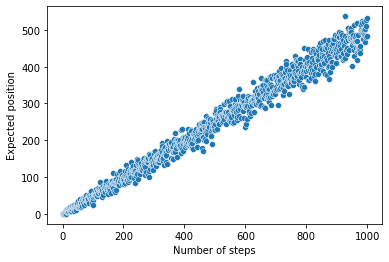

In [88]:
from tqdm import tqdm
p = 0.75
N = 1000
steps = np.arange(1000)

final_positions = np.array([])

for step in tqdm(steps):
  final_positions = np.append(final_positions, calc_final_position(step, p))
print(final_positions.mean())

sns.scatterplot(x = steps, y = final_positions)
plt.xlabel("Number of steps")
plt.ylabel("Expected position")


### Second part:
#### Diffusion in 2 dimensions: diffusion of a dye in water

1. Write a function that computes the final position of each molecule walker as a
function of the parameter 𝑝 and the number of steps 𝑁.

In [89]:
def calc_pos(N, p = 0.2):
    '''
    Args:
        N:         Number of steps each molecule moves
        p:         The probability of a molecule to stay in the cell
    Returns:
        mol_pos: Final position of the molecules as an array
    '''  
    molecule_position = np.zeros((400, 2))
    molecule_position[0:100] = [9, 9]
    molecule_position[100:200] = [9, 10]
    molecule_position[200:300] = [10, 9]
    molecule_position[300:400] = [10, 10]
    for i in range(molecule_position.shape[0]):
        pos = molecule_position[i]
        for j in range(N):
            # at center
            if 19 > pos[0] > 0 and 19 > pos[1] > 0:
                choices = [[0, 0], [0, -1], [-1, 0], [0, 1], [1, 0]]
                pos += np.array(choices[np.random.choice(len(choices), 1,
                                               p=[p, 0.25 * (1 - p), 0.25 * (1 - p), 0.25 * (1 - p), 0.25 * (1 - p)])[
                    0]])

            # at upper left corner
            elif pos[0] == 0 and pos[1] == 00:
                choices = [[0, 0], [0, 1], [1, 0]]
                pos += np.array(choices[np.random.choice(len(choices), 1, p=[p, 0.5 * (1 - p), 0.5 * (1 - p)])[0]])

            # at upper boundary
            elif pos[0] == 0 and 19 > pos[1] > 0:
                choices = [[0, 0], [0, -1], [0, 1], [1, 0]]
                pos += np.array(
                    choices[np.random.choice(len(choices), 1, p=[p, 0.33 * (1 - p), 0.33 * (1 - p), 0.33 * (1 - p)])[0]])

            # at upper right corner
            elif pos[0] == 0 and pos[1] == 19:
                choices = [[0, 0], [0, -1], [1, 0]]
                pos += np.array(choices[np.random.choice(len(choices), 1, p=[p, 0.5 * (1 - p), 0.5 * (1 - p)])[0]])

            # at left boundary
            elif 19 > pos[0] > 0 and pos[1] == 0:
                choices = [[0, 0], [-1, 0], [0, 1], [1, 0]]
                pos += np.array(
                    choices[np.random.choice(len(choices), 1, p=[p, 0.33 * (1 - p), 0.33 * (1 - p), 0.33 * (1 - p)])[0]])

            # at right boundary
            elif 19 > pos[0] > 0 and pos[1] == 19:
                choices = [[0, 0], [0, -1], [-1, 0], [1, 0]]
                pos += np.array(
                    choices[np.random.choice(len(choices), 1, p=[p, 0.33 * (1 - p), 0.33 * (1 - p), 0.33 * (1 - p)])[0]])

            # at bottom boundary
            elif pos[0] == 19 and 19 > pos[1] > 0:
                choices = [[0, 0], [0, -1], [-1, 0], [0, 1]]
                pos += np.array(
                    choices[np.random.choice(len(choices), 1, p=[p, 0.33 * (1 - p), 0.33 * (1 - p), 0.33 * (1 - p)])[0]])

            # at bottom left corner
            elif pos[0] == 19 and pos[1] == 0:
                choices = [[0, 0], [-1, 0], [0, 1]]
                pos += np.array(choices[np.random.choice(len(choices), 1, p=[p, 0.5 * (1 - p), 0.5 * (1 - p)])[0]])

            # at bottom right corner
            elif pos[0] == 19 and pos[1] == 19:
                choices = [[0, 0], [0, -1], [-1, 0]]
                pos += np.array(choices[np.random.choice(len(choices), 1, p=[p, 0.5 * (1 - p), 0.5 * (1 - p)])[0]])
        molecule_position[i] = pos

    return molecule_position

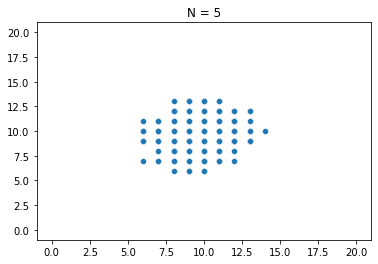

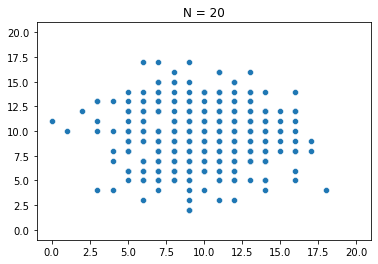

In [93]:
steps = [5, 10, 20, 50]
for _, step in enumerate(steps):
    output = calc_pos(N = step)
    f, ax = plt.subplots()
    ax = sns.scatterplot(x = output[:, 0], y = output[:, 1])
    ax.set_title("N = " + str(step))
    ax.set_xlim(left =- 1, right = 21)
    ax.set_ylim(bottom =- 1, top = 21)
    
    plt.savefig(f"part2_plots/ex2_{step}_step.jpg")
    plt.show()

# To be done :)